<a href="https://colab.research.google.com/github/5791nbm/FinCoLab/blob/main/markowitz_model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np, pandas as pd, yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimization

#on average there are 252 trading days in a year.
num_trading_days = 252

                                AAPL        WMT       TSLA          GE  \
Date                                                                     
2012-01-03 00:00:00-05:00  12.388996  15.298917   1.872000   68.163612   
2012-01-04 00:00:00-05:00  12.455577  15.141695   1.847333   68.906158   
2012-01-05 00:00:00-05:00  12.593860  15.068156   1.808000   68.869026   
2012-01-06 00:00:00-05:00  12.725513  14.961650   1.794000   69.240303   
2012-01-09 00:00:00-05:00  12.705326  15.007289   1.816667   70.019936   
...                              ...        ...        ...         ...   
2016-12-23 00:00:00-05:00  26.977625  20.071012  14.222667  140.022781   
2016-12-27 00:00:00-05:00  27.148958  20.117188  14.635333  140.110657   
2016-12-28 00:00:00-05:00  27.033190  20.004631  14.649333  139.232224   
2016-12-29 00:00:00-05:00  27.026247  19.990196  14.312000  139.276108   
2016-12-30 00:00:00-05:00  26.815556  19.949791  14.246000  138.792984   

                                AMZN 

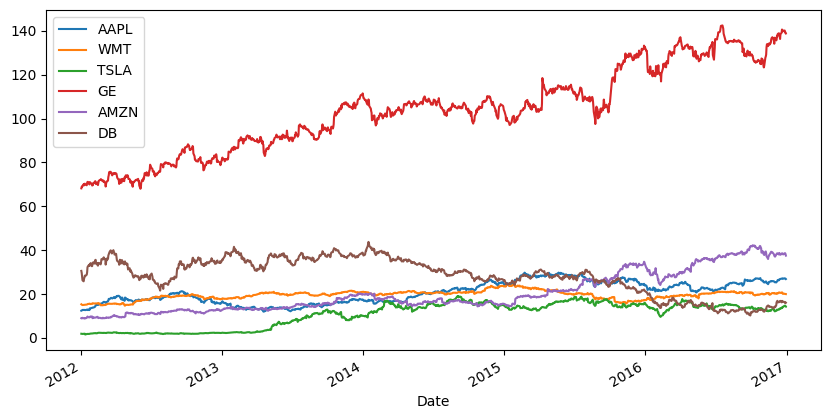

AAPL    0.154803
WMT     0.053214
TSLA    0.406862
GE      0.142554
AMZN    0.287153
DB     -0.128913
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.068351  0.008142  0.025434  0.014196  0.019009  0.024571
WMT   0.008142  0.028017  0.010265  0.009221  0.008545  0.013247
TSLA  0.025434  0.010265  0.252700  0.019334  0.041774  0.039047
GE    0.014196  0.009221  0.019334  0.032647  0.018026  0.031347
AMZN  0.019009  0.008545  0.041774  0.018026  0.094476  0.031574
DB    0.024571  0.013247  0.039047  0.031347  0.031574  0.139114


In [15]:

stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

start_date = '2012-01-01'
end_date = '2017-01-01'

def download_data():
  #name of stock as ket, stock values 2010-2017 as the values
  stock_data = {}
  #loop
  for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
  #return data frame
  return pd.DataFrame(stock_data)

def show_data(data):
  data.plot(figsize=(10, 5))
  plt.show()

def calculate_return(data):
  log_return = np.log(data/data.shift(1))
  #print(log_return)
  return log_return[1:]

def show_statistics(returns):
  # mean of annual return
  print(returns.mean() * num_trading_days)
  print(returns.cov() * num_trading_days)

def show_mean_variance(returns, weights):
  #we are after the annual return, multiply by trading days
  portfolio_return = np.sum(returns.mean() * weights) * num_trading_days
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * num_trading_days, weights)))
  print('Expected portfolio mean (return): ', portfolio_return)
  print('Expected portfolio volatility (standard dev.): ', portfolio_volatility)

if __name__ == '__main__':
  dataset = download_data()
  print(dataset)
  show_data(dataset)
  log_daily_returns = calculate_return(dataset)
  show_statistics(log_daily_returns)
